In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import sqlite3
import pandas as pd

In [2]:
def flatLC(t,t0, t1, peak=10):
    # Make an array of magnitudes to match input times
    lightcurve = np.zeros(np.size(t), dtype=float) + 99.
    # Select only times in the lightcurve duration window
    good = np.where( (t >= t0) & (t <= t1) )
    lightcurve[good] = peak
    return lightcurve

In [3]:
class SingleDetectMetric(metrics.BaseMetric):
    """
    Quantifies detectability of toyObjects.
    
    Parameters
    ----------
    ptsNeeded : int
        Number of an object's lightcurve points required to be above the 5-sigma limiting depth 
        before it is considered detected.
    
    Notes
    -----
    This metric assumes this will be run with a slicer that has had extra 
    parameters (t0, durration) added to the slicer.slicePoint 
    dict (which already contains ra, dec, fieldID, etc). All the observation information 
    (MJD of observation, 5-sigma limiting depth of each observation, etc) is contained in the
    dataSlice array. We request the filter information for each observation anticipating that
    more general lightcurve functions will need it as input.
    """
    def __init__(self, metricName='DetectabilityMetric', mjdCol='observationStartMJD', m5Col='fiveSigmaDepth',
                 filterCol='filter', ptsNeeded=1, total_obs=False, **kwargs):
        self.mjdCol = mjdCol
        self.m5Col = m5Col
        self.filterCol = filterCol
        self.ptsNeeded = ptsNeeded
        self.total_obs = total_obs
        super(SingleDetectMetric, self).__init__(col=[self.mjdCol, self.m5Col, 
                                                          self.filterCol],
                                                     units='Detected, 0 or 1',
                                                     metricName=metricName,
                                                     **kwargs)
        
    def run(self,  dataSlice, slicePoint=None):
        # Generate the lightcurve for this object
        lightcurve = flatLC(dataSlice[self.mjdCol], slicePoint['t0'],  slicePoint['t1'])
        # Check if there are enough points detected in the generated lightcurve
        npts = np.where( (lightcurve != 0.) & (lightcurve < dataSlice[self.m5Col]))[0].size
        if self.total_obs:
            return npts
        if npts >= self.ptsNeeded:
            return 1
        else:
            return 0

In [4]:
dbs = ['too_pairsmix_rate1_10yrs.db', 'too_pairsmix_rate10_10yrs.db', 
       'too_pairsmix_rate50_10yrs.db','too_pairsmix_rate100_10yrs.db']


Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos', 'observationStartMJD', 'filter'].
Found 2215699 visits
Running:  ['too_pairsmix_rate1_cameraOff_USER', 'too_pairsmix_rate1_total_obs_cameraOff_USER']
Completed metric generation.
Running:  ['too_pairsmix_rate1_cameraOn_USER', 'too_pairsmix_rate1_total_obs_cameraOn_USER']


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/astropy/_erfa/core.py:118: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/astropy/_erfa/core.py:118: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.
-------No Camera---------
Number of events 10
3 out of footprint
5 detected
2 not detected
54.0 Total number of event observations
-------Chip Gaps On---------
Number of events 10
3 out of footprint
5 detected
2 not detected
48.0 Total number of event observations
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos', 'observationStartMJD', 'filter'].
Found 2216905 visits
Running:  ['too_pairsmix_rate10_cameraOff_USER', 'too_pairsmix_rate10_total_obs_cameraOff_USER']
Completed metric generation.
Running:  ['too_pairsmix_rate10_cameraOn_USER', 'too_pairsmix_rate10_total_obs_cameraOn_USER']


/Users/yoachim/gitRepos/sims_coordUtils/python/lsst/sims/coordUtils/CameraUtils.py:382: MultipleChipWarning: An object has landed on multiple chips.  You asked for this not to happen.
We will return only one of the chip names.  If you want both, try re-running with the kwarg allow_multiple_chips=True.
Offending chip names were ['R:0,4 S:2,0,A', 'R:0,4 S:2,0,B']
Offending pupil coordinate point was -0.022146379329 0.020509376723

  category=MultipleChipWarning)
/Users/yoachim/gitRepos/sims_coordUtils/python/lsst/sims/coordUtils/CameraUtils.py:382: MultipleChipWarning: An object has landed on multiple chips.  You asked for this not to happen.
We will return only one of the chip names.  If you want both, try re-running with the kwarg allow_multiple_chips=True.
Offending chip names were ['R:4,0 S:0,2,A', 'R:4,0 S:0,2,B']
Offending pupil coordinate point was 0.022310111737 -0.020518483736

  category=MultipleChipWarning)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.
-------No Camera---------
Number of events 100
21 out of footprint
58 detected
21 not detected
535.0 Total number of event observations
-------Chip Gaps On---------
Number of events 100
21 out of footprint
58 detected
21 not detected
493.0 Total number of event observations
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos', 'observationStartMJD', 'filter'].
Found 2221922 visits
Running:  ['too_pairsmix_rate50_cameraOff_USER', 'too_pairsmix_rate50_total_obs_cameraOff_USER']
Completed metric generation.
Running:  ['too_pairsmix_rate50_cameraOn_USER', 'too_pairsmix_rate50_total_obs_cameraOn_USER']


/Users/yoachim/gitRepos/sims_coordUtils/python/lsst/sims/coordUtils/CameraUtils.py:382: MultipleChipWarning: An object has landed on multiple chips.  You asked for this not to happen.
We will return only one of the chip names.  If you want both, try re-running with the kwarg allow_multiple_chips=True.
Offending chip names were ['R:4,0 S:0,2,A', 'R:4,0 S:0,2,B']
Offending pupil coordinate point was 0.018623524573 -0.020523667218

  category=MultipleChipWarning)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting complete.
-------No Camera---------
Number of events 500
97 out of footprint
254 detected
149 not detected
2455.0 Total number of event observations
-------Chip Gaps On---------
Number of events 500
97 out of footprint
254 detected
149 not detected
2234.0 Total number of event observations
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos', 'observationStartMJD', 'filter'].
Found 2232393 visits
Running:  ['too_pairsmix_rate100_cameraOff_USER', 'too_pairsmix_rate100_total_obs_cameraOff_USER']
Completed metric generation.
Running:  ['too_pairsmix_rate100_cameraOn_USER', 'too_pairsmix_rate100_total_obs_cameraOn_USER']


/Users/yoachim/gitRepos/sims_coordUtils/python/lsst/sims/coordUtils/CameraUtils.py:382: MultipleChipWarning: An object has landed on multiple chips.  You asked for this not to happen.
We will return only one of the chip names.  If you want both, try re-running with the kwarg allow_multiple_chips=True.
Offending chip names were ['R:4,0 S:0,2,A', 'R:4,0 S:0,2,B']
Offending pupil coordinate point was 0.022057291926 -0.020518579735

  category=MultipleChipWarning)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.
-------No Camera---------
Number of events 1000
184 out of footprint
501 detected
315 not detected
4803.0 Total number of event observations
-------Chip Gaps On---------
Number of events 1000
184 out of footprint
501 detected
315 not detected
4369.0 Total number of event observations


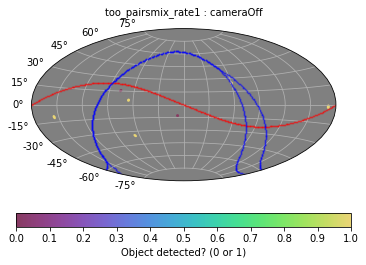

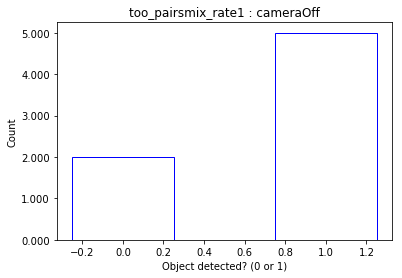

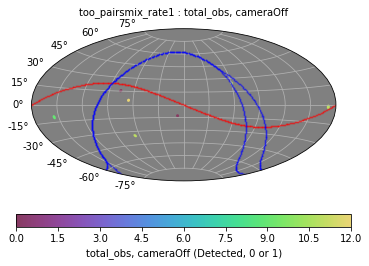

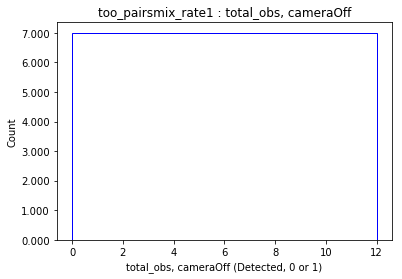

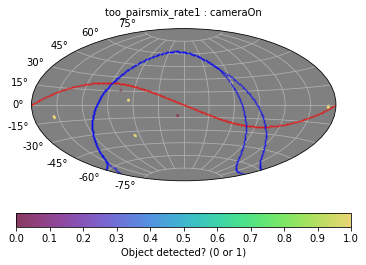

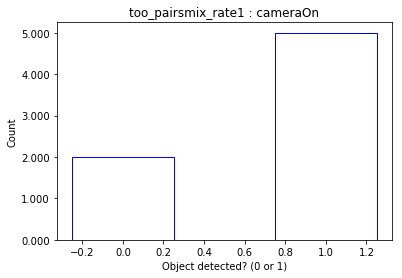

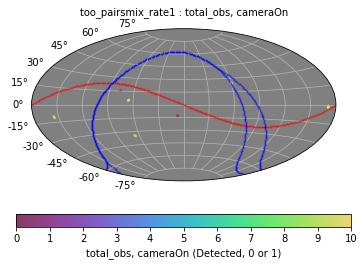

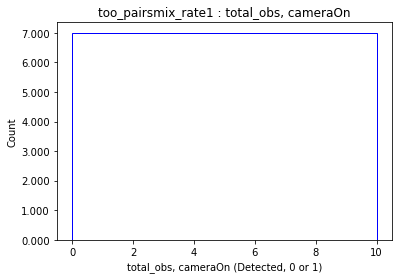

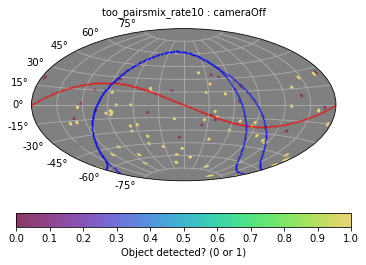

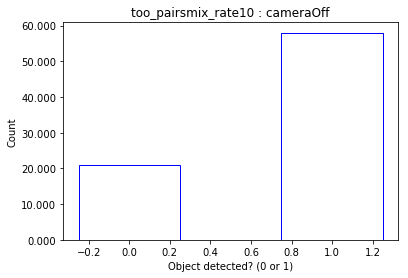

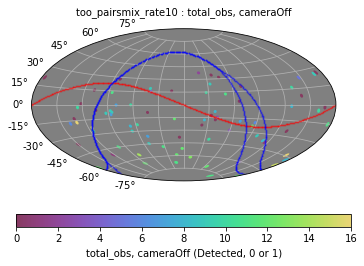

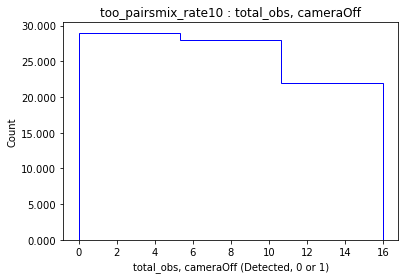

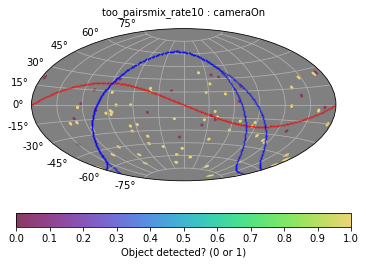

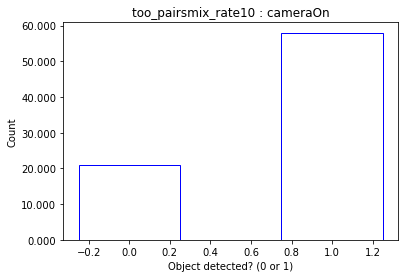

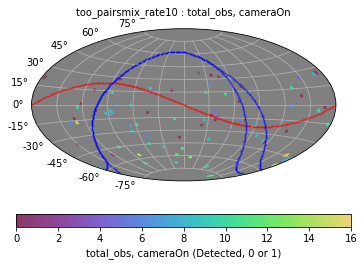

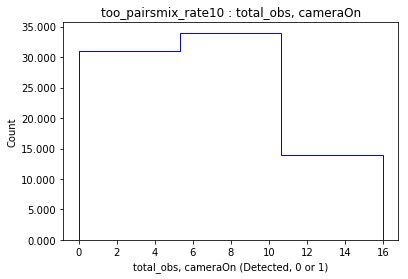

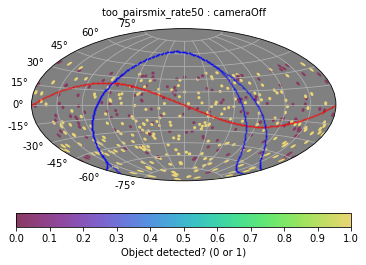

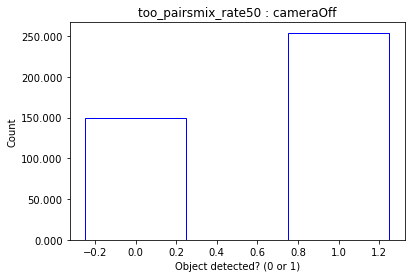

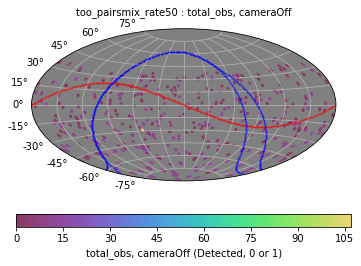

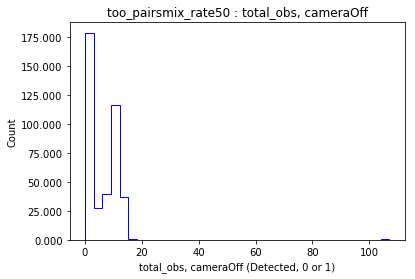

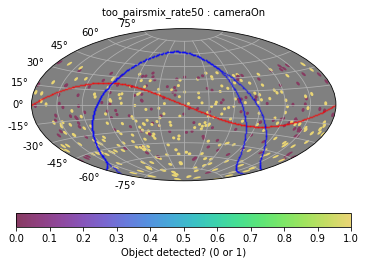

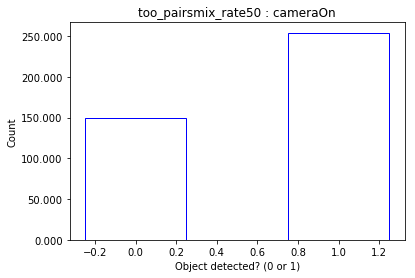

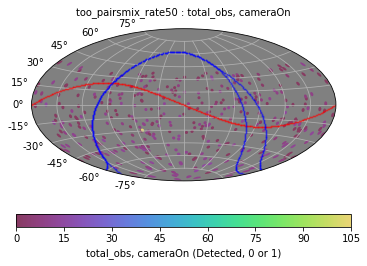

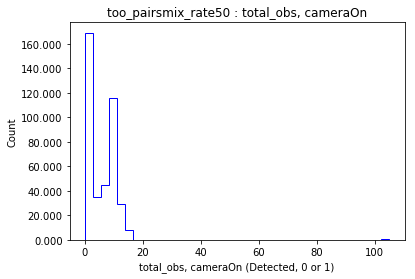

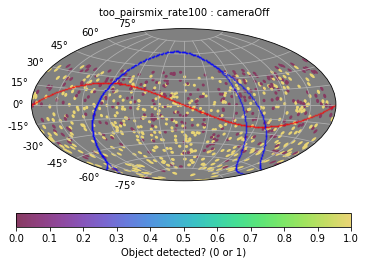

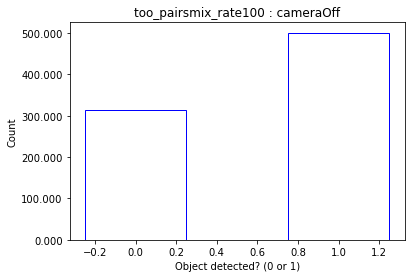

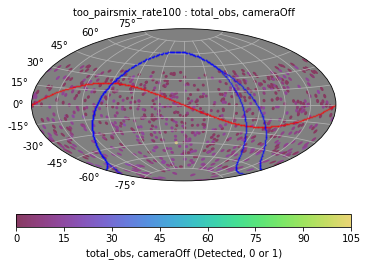

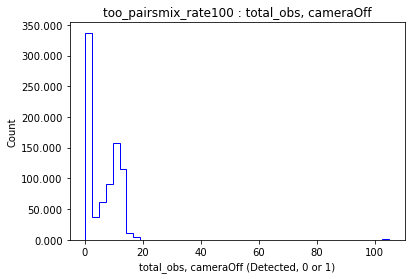

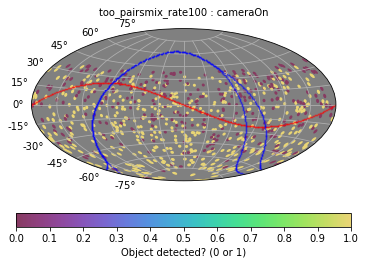

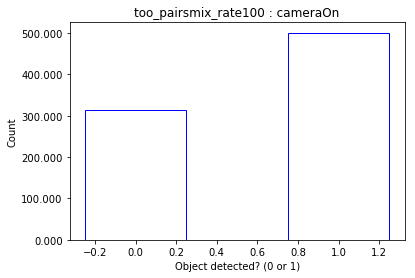

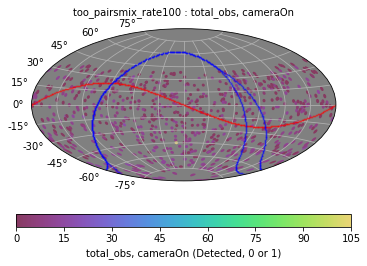

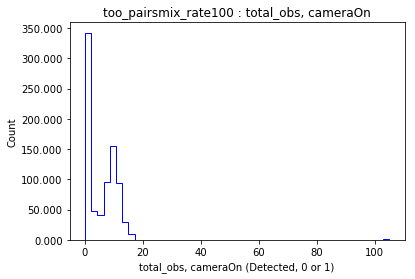

In [5]:
# Pull the events out
for dbindx in np.arange(len(dbs)):

    con = sqlite3.connect(dbs[dbindx])
    events = pd.read_sql('select * from events;', con)
    con.close()
    
    slicer = slicers.UserPointsSlicer(np.degrees(events['ra']), np.degrees(events['dec']), latLonDeg=True)
    slicer.slicePoints['t0'] = events['mjd_start']
    slicer.slicePoints['t1'] = events['expires']
    
    database = db.OpsimDatabase(dbs[dbindx])
    outDir = 'temp'
    resultsDb = db.ResultsDb(outDir=outDir)
    runName= dbs[dbindx][:-9]

    metric = SingleDetectMetric(metricName='cameraOff')
    sql = ''
    plotDict = {'xlabel':'Object detected? (0 or 1)'}
    plotDict['bins'] = [-0.25, 0.25, 0.75, 1.25]
    bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName, plotDict=plotDict)
    bundleList = [bundle]
    metric = SingleDetectMetric(metricName='total_obs, cameraOff', total_obs=True)
    bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName)
    bundleList.append(bundle)
    
    # Let's do it with the camera on as well
    metric = SingleDetectMetric(metricName='cameraOn')
    slicer = slicers.UserPointsSlicer(np.degrees(events['ra']), np.degrees(events['dec']), latLonDeg=True, useCamera=True)
    slicer.slicePoints['t0'] = events['mjd_start']
    slicer.slicePoints['t1'] = events['expires']
    bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName, plotDict=plotDict)
    bundleList.append(bundle)
    metric = SingleDetectMetric(metricName='total_obs, cameraOn', total_obs=True)
    bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName)
    bundleList.append(bundle)
    
    for b in bundleList:
        b.setRunName(runName)
    
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, database, outDir=outDir, resultsDb=resultsDb)
    
    bgroup.runAll()

    bgroup.plotAll(closefigs=False)
    
    print('-------No Camera---------')
    print('Number of events', len(events))
    print(np.where(bundleList[0].metricValues.mask == True)[0].size, 'out of footprint')
    print(np.where(bundleList[0].metricValues == 1)[0].size, 'detected')
    print(np.where(bundleList[0].metricValues == 0)[0].size, 'not detected')
    print(np.median(bundleList[1].metricValues.sum()), 'Total number of event observations')

    print('-------Chip Gaps On---------')
    print('Number of events', len(events))
    print(np.where(bundleList[2].metricValues.mask == True)[0].size, 'out of footprint')
    print(np.where(bundleList[2].metricValues == 1)[0].size, 'detected')
    print(np.where(bundleList[2].metricValues == 0)[0].size, 'not detected')
    print(np.median(bundleList[3].metricValues.sum()), 'Total number of event observations')
